In [1]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import Input, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import random as rn
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

import sounddevice as sd

import pandas as pd
import tensorflow as tf
import glob

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import IPython.display as ipd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', color_codes=True)

# Pre processing

# Deep learning

In [2]:
seed = 100
np.random.seed(seed)
rn.seed(seed)
tf.set_random_seed(seed)

In [3]:
labels = pd.read_csv('train_labels.csv')
sample_solution = pd.read_csv('sample_submission.csv')
train = np.load('train_data.npy')
test = np.load('test_data.npy')

In [4]:
print(train.shape)
print(test.shape)
print(labels.shape)

(3999, 44100)
(3997, 44100)
(3999, 2)


In [5]:
# sampling frequency
fs = 44100
#sd.play(train[6], fs)
#sd.play(test[34], fs)

In [14]:
# train: we see 3999 records of data with sampling frequency of 44100
# test: we see 3997 records of data with sampling frequency of 44100

drop_labels = labels.drop('Id',1)
Y = to_categorical(drop_labels ,2)

print(Y[2])

train_2d = train.reshape(-1,210,210,1)
test_2d = test.reshape(-1,210,210,1)

x_train, x_test, y_train, y_test = train_test_split(
    train_2d, Y, test_size=0.14, random_state=seed)


print("TRAIN SHAPE")
print(x_train.shape, y_train.shape)
print("TEST SHAPE")
print(x_test.shape, y_test.shape)

[1. 0.]
TRAIN SHAPE
(3439, 210, 210, 1) (3439, 2)
TEST SHAPE
(560, 210, 210, 1) (560, 2)


In [15]:
n_timesteps, n_features, n_outputs = x_train.shape[0], x_train.shape[1], y_train.shape[0]
print('# of samples / timestamps:', n_timesteps)
print('frequency    / features  :', n_features)
print('# of outputs / outputs   :', n_outputs)

# of samples / timestamps: 3439
frequency    / features  : 210
# of outputs / outputs   : 3439


In [153]:
# create convolution neural network
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size=(3, 3),
                padding = 'same',
                activation = 'tanh',
                input_shape=(210,210,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 96, kernel_size = (3,3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 96, kernel_size = (3,3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 96, kernel_size = (3,3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(72, activation='tanh')),
model.add(Dense(16, activation='tanh')),
model.add(Dense(2, activation='softmax'))

In [154]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 210, 210, 8)       80        
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 105, 105, 8)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 103, 103, 32)      2336      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 51, 51, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 49, 49, 96)        27744     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 22, 22, 96)      

In [155]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [156]:
epochs, batch_size = 30, 256
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# fit network
mf = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
          validation_data=(x_test, y_test))

Train on 3439 samples, validate on 560 samples
Epoch 1/30
3439/3439 [==============================] - 4s 1ms/sample - loss: 0.3531 - acc: 0.8345 - val_loss: 0.2311 - val_acc: 0.9036
Epoch 2/30
3439/3439 [==============================] - 3s 820us/sample - loss: 0.2085 - acc: 0.9128 - val_loss: 0.2004 - val_acc: 0.9107
Epoch 3/30
3439/3439 [==============================] - 3s 818us/sample - loss: 0.1836 - acc: 0.9189 - val_loss: 0.1934 - val_acc: 0.9161
Epoch 4/30
3439/3439 [==============================] - 3s 825us/sample - loss: 0.1614 - acc: 0.9322 - val_loss: 0.1692 - val_acc: 0.9393
Epoch 5/30
3439/3439 [==============================] - 3s 819us/sample - loss: 0.1417 - acc: 0.9416 - val_loss: 0.1556 - val_acc: 0.9411
Epoch 6/30
3439/3439 [==============================] - 3s 828us/sample - loss: 0.1338 - acc: 0.9445 - val_loss: 0.1560 - val_acc: 0.9446
Epoch 7/30
3439/3439 [==============================] - 3s 824us/sample - loss: 0.1211 - acc: 0.9474 - val_loss: 0.1371 - val_a

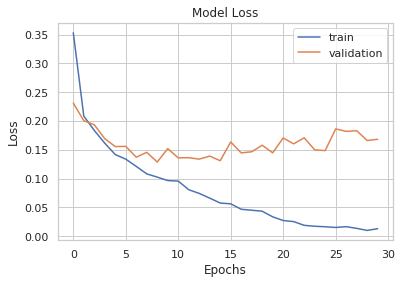

In [163]:
plt.plot(mf.history['loss'])
plt.plot(mf.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'])
plt.show()

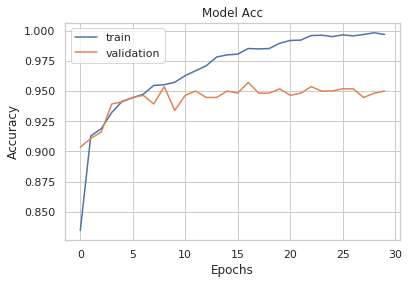

In [164]:
plt.plot(mf.history['acc'])
plt.plot(mf.history['val_acc'])
plt.title('Model Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'])
plt.show()

In [165]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)

560/560 [==============================] - 0s 386us/sample - loss: 0.1682 - acc: 0.9500


In [166]:
final_predictions = model.predict_classes(test_2d)
print(final_predictions)

[0 0 0 ... 0 0 1]


In [167]:
i=0
correct_classifications=[]
incorrect_classifications=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == final_predictions[i]):
        correct_classifications.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i]) == final_predictions[i]):
        incorrect_classifications.append(i)

In [168]:
print (len(correct_classifications))
print (len(incorrect_classifications))

439
121


In [ ]:
sample_solution['Label'] = final_predictions

In [ ]:
sample_solution.to_csv('audio_binary_classification_predict-5.csv', index=False)